In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
meta = pd.read_csv("/home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hippolyte_only/interval_HAAS/meta_table.tsv", sep="\t")

In [3]:
pheno = pd.read_csv("/home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hippolyte_only/interval_phenotypes/INTERVALdata_14MAY2020.csv",sep=",", encoding = "ISO-8859-1")

In [5]:
meta["valid_id"] = meta["EpiCovId_24m"]
meta.loc[~meta["EpiCovId_bl"].isnull(), "valid_id"] = meta.loc[~meta["EpiCovId_bl"].isnull(),"EpiCovId_bl"]

In [78]:
df = pd.merge(meta, pheno, left_on="valid_id", right_on="identifier")
df["DateTime"] = pd.to_datetime(df["DateTime"], format="%Y-%m-%d %H:%M:%S")
df = df.sort_values("DateTime",ascending=True).drop_duplicates("valid_id",keep="first")
df.rename(columns={'PLT_10_9_L_bl':"PLT",'MPV_fL_bl':"MPV",'PCT_PCT_bl':"PCT",'PDW_fL_bl':"PDW"},inplace=True)

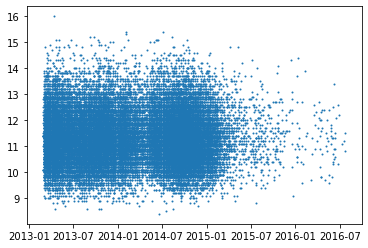

In [79]:
plt.scatter(df["DateTime"], df.MPV,s=1)

In [80]:
df = df.loc[df.PLT > 20]

In [81]:
df["days"] = (df["DateTime"] - df["DateTime"].min()).dt.days
df["months"] = df["days"] // 30

In [82]:
month_number = df.groupby("months")["PLT"].count()

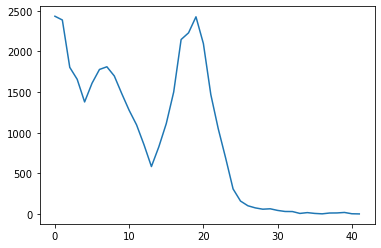

In [83]:
plt.figure()
plt.plot(month_number.index,month_number)

In [84]:
df = df.loc[df.months < 25]

In [85]:
month_avg = df.groupby("months")[["PLT","MPV","PCT","PDW"]].mean()

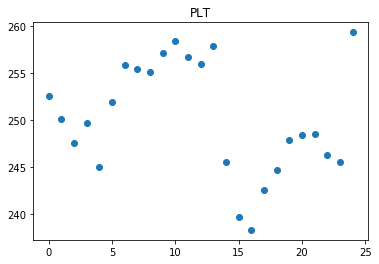

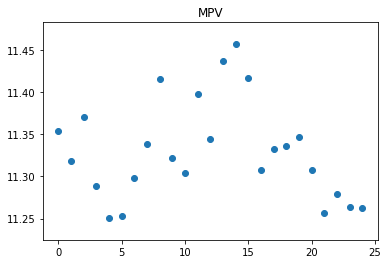

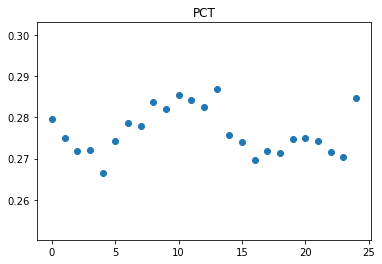

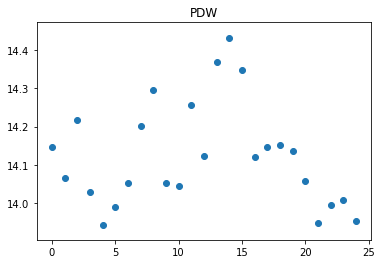

In [86]:
for c in month_avg:
    plt.figure()
    plt.scatter(month_avg.index,month_avg[c],label=c)
    plt.title(c)

In [91]:
offset = month_avg - df[month_avg.columns].mean()

In [103]:
df_adj = df[month_avg.columns] - pd.merge(df[["months"]], offset, right_index=True,left_on="months",how="left")[month_avg.columns]
df[[c+"_RAW" for c in df_adj.columns]] = df[df_adj.columns]
df[df_adj.columns] = df_adj

In [119]:
df["cohort"] = df.interval
df.loc[~df.EpiCovId_bl.isnull() & (df.sexPulse == 1),"cohort"] = "MBL"
df.loc[~df.EpiCovId_bl.isnull() & (df.sexPulse == 2),"cohort"] = "FBL"

In [125]:
offset = df.groupby("cohort")[["PLT","MPV","PCT","PDW"]].mean() - df[["PLT","MPV","PCT","PDW"]].mean()

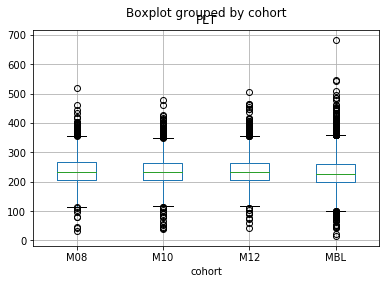

In [126]:
df.loc[df.sexPulse == 1].boxplot(column="PLT",by="cohort")

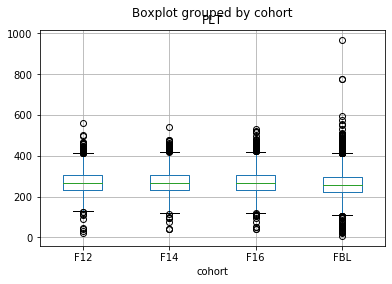

In [127]:
df.loc[df.sexPulse == 2].boxplot(column="PLT",by="cohort")

In [128]:
df_adj = df[offset.columns] - pd.merge(df[["cohort"]], offset, right_index=True,left_on="cohort",how="left")[offset.columns]
df[df_adj.columns] = df_adj

In [132]:
df.head()

,FileName,SampleNo,Instrument,DateTime,DateTime_rank,SampleType,WithinSampleRank,EpiCovId_bl,EpiCovId_24m,EpiCovId_48m,...,LDL_48m,HBA1C_48m,HBF_48m,days,months,PLT_RAW,MPV_RAW,PCT_RAW,PDW_RAW,cohort
0,[XN-10^11041][00-11_8][20130301_101944][ ...,INT_116_6580100,XN-10^11041,2013-03-01 10:19:44,2.0,NHSBT,1,1090916.0,NaN,NaN,...,NaN,NaN,NaN,0,0,209.112422,10.974987,0.216325,13.773186,MBL
2,[XN-10^11041][00-11_8][20130301_102100][ ...,INT_116_6580000,XN-10^11041,2013-03-01 10:21:00,3.0,NHSBT,1,1111731.0,NaN,NaN,...,NaN,NaN,NaN,0,0,232.112422,11.374987,0.266325,14.873186,FBL
4,[XN-10^11041][00-11_8][20130301_102216][ ...,INT_116_2129800,XN-10^11041,2013-03-01 10:22:16,4.0,NHSBT,1,1070498.0,NaN,NaN,...,NaN,NaN,NaN,0,0,193.112422,10.074987,0.196325,12.073186,MBL
6,[XN-10^11041][00-11_8][20130301_102333][ ...,INT_116_4555900,XN-10^11041,2013-03-01 10:23:33,5.0,NHSBT,1,1042358.0,NaN,NaN,...,NaN,NaN,NaN,0,0,140.112422,11.874987,0.146325,12.973186,FBL
7,[XN-10^11041][00-11_8][20130301_102449][ ...,INT_116_4555800,XN-10^11041,2013-03-01 10:24:49,6.0,NHSBT,1,1111391.0,NaN,NaN,...,NaN,NaN,NaN,0,0,194.112422,12.274987,0.246325,16.273186,FBL


In [133]:
columns_of_interest = ["valid_id","FileName","SampleNo","Instrument","DateTime","PLT","MPV","PDW","PCT"]

In [134]:
df[columns_of_interest]

,valid_id,FileName,SampleNo,Instrument,DateTime,PLT,MPV,PDW,PCT
0,1090916.0,[XN-10^11041][00-11_8][20130301_101944][ ...,INT_116_6580100,XN-10^11041,2013-03-01 10:19:44,224.205298,10.978553,13.665447,0.231985
2,1111731.0,[XN-10^11041][00-11_8][20130301_102100][ ...,INT_116_6580000,XN-10^11041,2013-03-01 10:21:00,216.908901,11.323868,14.921301,0.247011
4,1070498.0,[XN-10^11041][00-11_8][20130301_102216][ ...,INT_116_2129800,XN-10^11041,2013-03-01 10:22:16,208.205298,10.078553,11.965447,0.211985
6,1042358.0,[XN-10^11041][00-11_8][20130301_102333][ ...,INT_116_4555900,XN-10^11041,2013-03-01 10:23:33,124.908901,11.823868,13.021301,0.127011
7,1111391.0,[XN-10^11041][00-11_8][20130301_102449][ ...,INT_116_4555800,XN-10^11041,2013-03-01 10:24:49,178.908901,12.223868,16.321301,0.227011
9,1033359.0,[XN-10^11041][00-11_8][20130301_102606][ ...,INT_116_4556000,XN-10^11041,2013-03-01 10:26:06,277.205298,11.378553,14.165447,0.311985
11,1108755.0,[XN-10^11041][00-11_8][20130301_102722][ ...,INT_116_6576400,XN-10^11041,2013-03-01 10:27:22,301.908901,12.723868,17.221301,0.387011
12,1043135.0,[XN-10^11041][00-11_8][20130301_102954][ ...,INT_116_6574500,XN-10^11041,2013-03-01 10:29:54,174.205298,12.478553,16.465447,0.231985
13,1006117.0,[XN-10^11041][00-11_8][20130301_103113][ ...,INT_116_6574400,XN-10^11041,2013-03-01 10:31:13,293.908901,11.323868,14.321301,0.337011
15,1072299.0,[XN-10^11041][00-11_8][20130301_103229][ ...,INT_116_1961100,XN-10^11041,2013-03-01 10:32:29,216.908901,11.423868,14.321301,0.237011
